# 21. Model Monitoring and Performance Tracking | مراقبة النموذج وتتبع الأداء

## 📚 Learning Objectives

By completing this notebook, you will:
- Monitor deployed models in production
- Track model performance metrics over time
- Detect model drift and degradation
- Implement alerting systems for model issues

## 🔗 Prerequisites

- ✅ Unit 5: Deployment examples
- ✅ Understanding of model evaluation

---

## Official Structure Reference

This notebook supports **Course 05, Unit 5** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 21. Model Monitoring and Performance Tracking | مراقبة النموذج وتتبع الأداء

**All concepts are explained in the code comments below - you can learn everything from this notebook alone!**

---

## 🔗 After Deployment | بعد النشر

**Models don't stay perfect forever!**
- Models degrade over time (data drift, concept drift)
- Performance can drop without warning
- We need to monitor and track performance

**This notebook teaches monitoring!**
- We'll learn **performance tracking** - monitor metrics over time
- We'll learn **drift detection** - detect when models degrade
- We'll learn **alerting** - get notified of issues
- We'll learn **logging** - track predictions and errors

**This ensures models stay reliable in production!**

---

## Learning Objectives | أهداف التعلم
1. Track model performance metrics over time
2. Detect data drift and concept drift
3. Implement alerting for model issues
4. Log predictions and monitor model health

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

print("✅ Libraries imported!")
print("\n📚 This notebook covers:")
print("   - Performance tracking")
print("   - Drift detection")
print("   - Alerting systems")
print("   - Model health monitoring")

✅ Libraries imported!

📚 This notebook covers:
   - Performance tracking
   - Drift detection
   - Alerting systems
   - Model health monitoring


In [2]:
# Step 2: Simulate performance metrics over time
dates = pd.date_range(start='2024-01-01', periods=30, freq='D')

# Simulate accuracy degrading over time (model drift)
baseline_accuracy = 0.92
drift = np.linspace(0, 0.15, 30)  # Gradual degradation
noise = np.random.normal(0, 0.02, 30)
accuracy = baseline_accuracy - drift + noise
accuracy = np.clip(accuracy, 0, 1)  # Keep in [0, 1] range

metrics_df = pd.DataFrame({
    'date': dates,
    'accuracy': accuracy,
    'predictions_count': np.random.randint(1000, 5000, 30)
})

print("Performance Metrics Over Time:")
print(metrics_df.head(10))

Performance Metrics Over Time:
        date  accuracy  predictions_count
0 2024-01-01  0.905911               4859
1 2024-01-02  0.919300               1484
2 2024-01-03  0.912386               4157
3 2024-01-04  0.903504               2552
4 2024-01-05  0.957923               1060
5 2024-01-06  0.896160               1539
6 2024-01-07  0.868138               3250
7 2024-01-08  0.868802               3891
8 2024-01-09  0.878178               3107
9 2024-01-10  0.871084               4937


1. Performance Tracking | تتبع الأداء


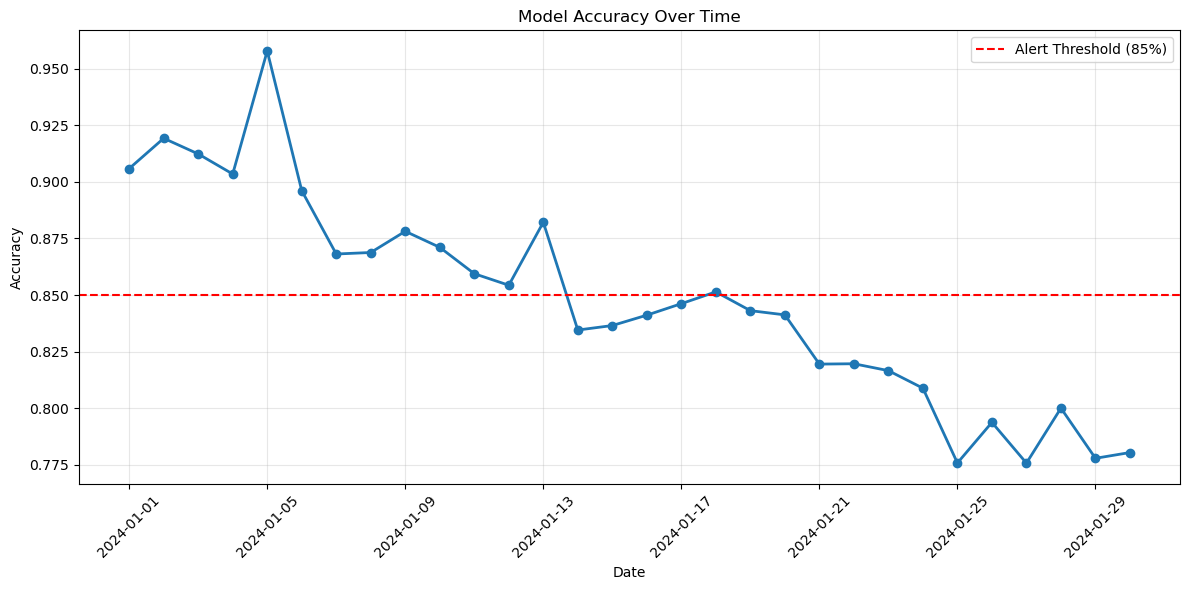


✅ Performance trend visualized!
Current accuracy: 0.780
Baseline accuracy: 0.920
Degradation: 14.0%


In [3]:
# Step 3: Visualize Performance Trend
print("=" * 70)
print("1. Performance Tracking | تتبع الأداء")
print("=" * 70)

plt.figure(figsize=(12, 6))
plt.plot(metrics_df['date'], metrics_df['accuracy'], marker='o', linewidth=2)
plt.axhline(y=0.85, color='r', linestyle='--', label='Alert Threshold (85%)')
plt.title('Model Accuracy Over Time')
plt.xlabel('Date')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n✅ Performance trend visualized!")
print(f"Current accuracy: {metrics_df['accuracy'].iloc[-1]:.3f}")
print(f"Baseline accuracy: {baseline_accuracy:.3f}")
print(f"Degradation: {(baseline_accuracy - metrics_df['accuracy'].iloc[-1])*100:.1f}%")

In [4]:
# Step 4: Drift Detection
print("\n" + "=" * 70)
print("2. Drift Detection | اكتشاف الانحراف")
print("=" * 70)

threshold = 0.85
below_threshold = metrics_df[metrics_df['accuracy'] < threshold]

if len(below_threshold) > 0:
    print(f"⚠️  ALERT: Model accuracy below threshold on {len(below_threshold)} days!")
    print("\nDates with low accuracy:")
    for idx, row in below_threshold.iterrows():
        print(f"  {row['date'].strftime('%Y-%m-%d')}: {row['accuracy']:.3f}")
else:
    print("✅ No drift detected - model performance is stable")

print("\n💡 Tip: Set up automated alerts when metrics drop below thresholds!")


2. Drift Detection | اكتشاف الانحراف
⚠️  ALERT: Model accuracy below threshold on 16 days!

Dates with low accuracy:
  2024-01-14: 0.835
  2024-01-15: 0.837
  2024-01-16: 0.841
  2024-01-17: 0.846
  2024-01-19: 0.843
  2024-01-20: 0.841
  2024-01-21: 0.819
  2024-01-22: 0.820
  2024-01-23: 0.817
  2024-01-24: 0.809
  2024-01-25: 0.776
  2024-01-26: 0.794
  2024-01-27: 0.776
  2024-01-28: 0.800
  2024-01-29: 0.778
  2024-01-30: 0.780

💡 Tip: Set up automated alerts when metrics drop below thresholds!
